# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

### Store the dataset into the Dataframe


In [2]:
data = pd.read_csv("dataset.csv", encoding='utf-8', parse_dates=["clear_date", "posting_date", "document_create_date", "document_create_date.1", "due_in_date", "baseline_create_date"])

### Check the shape of the dataframe


In [3]:
data.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  object        
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

### Display All the column names

In [5]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
data.describe()

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen
count,50000.000000,5.000000e+04,50000.0,0.0,50000.000000,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,1.0,NaN,32337.021651,2.011340e+09,0.200000
std,0.460708,2.885235e+08,0.0,NaN,39205.975231,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,1.0,NaN,0.720000,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,1.0,NaN,4928.312500,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,1.0,NaN,17609.010000,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,1.0,NaN,47133.635000,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,1.0,NaN,668593.360000,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-03-30,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
(data.isna().sum()/len(data))*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
data[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
comparison_column = np.where((data["baseline_create_date"] == data["document_create_date"]) & (data["baseline_create_date"]==data["document_create_date.1"]) , True, False)
np.sum(comparison_column)

0

#### Please check, Column 'posting_id' is constant columns or not


In [11]:
data['posting_id'].skew()

0

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
data['isOpen'].skew()

1.5000450017250675

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
data.drop(columns=['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [15]:
data[data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaT,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [16]:
len(data[data.duplicated()])

1161

### Drop all the Duplicate Rows

In [17]:
data = data[data.duplicated() == False]  #Onky storing those values in my data where the data.duplicated is False

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
len(data[data.duplicated()])

0

### Check for the number of Rows and Columns in your dataset

In [19]:
data.shape

(48839, 12)

### Find out the total count of null values in each columns

In [20]:
data.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [21]:
data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date                     object
invoice_currency                object
total_open_amount              float64
baseline_create_date            object
cust_payment_terms              object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
data[['clear_date', 'posting_date', 'due_in_date', 'baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date                     object
baseline_create_date            object
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
data['clear_date'] = pd.to_datetime(data['clear_date'], format="%Y%m%d")
data['posting_date'] = pd.to_datetime(data['posting_date'], format="%Y%m%d")
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format="%Y%m%d")
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format="%Y%m%d")

In [24]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4


### Please check the datatype of all the columns after conversion of the above 4 columns

In [25]:
data[['clear_date', 'posting_date', 'due_in_date', 'baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [26]:
data['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [27]:
data['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [28]:
data['converted_usd'] = data.apply(lambda x: 0.7 * x['total_open_amount'] if x['invoice_currency'] == "CAD" else x['total_open_amount'], axis=1)

### Display the new "converted_usd" column values

In [29]:
data['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [30]:
data.groupby("buisness_year").apply(len)

buisness_year
2019.0    33975
2020.0    14864
dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [31]:
data.drop(columns=['invoice_currency','total_open_amount'],inplace=True)

### Write a code to check the number of columns in dataframe

In [32]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

In [33]:
len(data.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [34]:
data.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

#### Find out the number of null values from the column that you got from the above code

In [35]:
data['clear_date'].isna().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [36]:
maindata = data[data['clear_date'].isna() == False]
nulldata = data[data['clear_date'].isna()]

### Check the number of Rows and Columns for both the dataframes 

In [37]:
maindata.shape

(39158, 11)

In [38]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [39]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [40]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [41]:
maindata['Delay'] = maindata['clear_date'] - maindata['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [42]:
avgdelay_mapper = maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [43]:
maindata['avg_delay'] = maindata['name_customer'].map(avgdelay_mapper)

In [44]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,8 days 02:10:54.545454545
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-3 days +19:33:27.692307693
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,71 days 10:40:00


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [45]:
maindata['avg_delay'] = maindata['avg_delay'].dt.total_seconds()

### Display the maindata dataframe 

In [46]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [47]:
maindata.drop(columns=['Delay','clear_date'],inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [48]:
X = maindata.drop(["avg_delay"], axis=1).copy()

In [49]:
y = maindata["avg_delay"].copy()

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [50]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.40, random_state=42, shuffle=False)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [51]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494,)
(15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [52]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.50, random_state=42, shuffle=False)

### Please check for the number of rows and columns of all the 4 dataframes 

In [53]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832,)
(7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

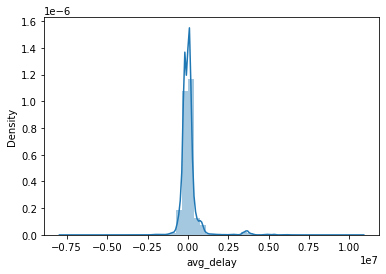

In [54]:
sns.distplot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [55]:
new_xtrain = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

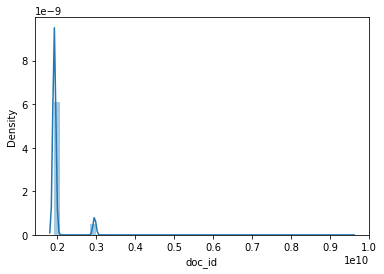

In [56]:
sns.distplot(X_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


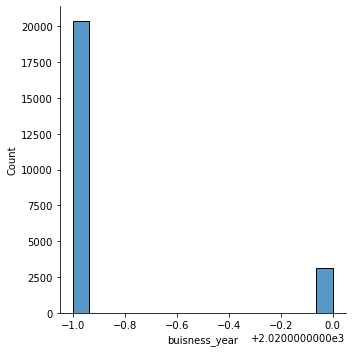

In [57]:
sns.displot(X_train['buisness_year'])

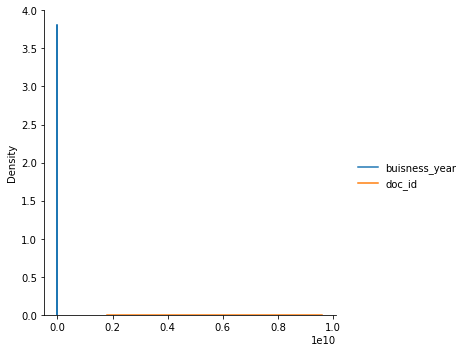

In [58]:
sns.displot(data=X_train[['buisness_year', 'doc_id']], kind='kde')

# Feature Engineering 

### Display and describe the X_train dataframe 

In [59]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...
29659,U001,0200772670,ASSOCIAT associates,2019.0,1.929725e+09,2019-08-08,2019-08-23,2019-08-08,NAU5,17737.190
29662,U001,0200794332,COST corporation,2020.0,1.930469e+09,2020-02-06,2020-02-21,2020-02-06,NAAX,62408.160
29663,U001,0200769623,WAL-MAR associates,2019.0,1.929143e+09,2019-04-14,2019-04-29,2019-04-14,NAH4,20265.150
29664,U001,0200696090,UNITE,2019.0,1.928950e+09,2019-03-18,2019-04-02,2019-03-18,NAA8,4962.340


In [60]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132842,2.012017e+09,30762.476822
std,0.339412,2.853757e+08,36595.303329
min,2019.000000,1.928502e+09,2.400000
25%,2019.000000,1.929181e+09,4620.800000
50%,2019.000000,1.929733e+09,17027.670000
75%,2019.000000,1.930209e+09,45545.810000
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [61]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [62]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [63]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [64]:
X_train[['business_code', 'business_code_enc']]

,business_code,business_code_enc
0,U001,1
1,U001,1
2,U001,1
4,U001,1
5,CA02,0
...,...,...
29659,U001,1
29662,U001,1
29663,U001,1
29664,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [65]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [66]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [67]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [68]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [69]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [70]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [71]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [72]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [73]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [74]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [75]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [76]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [77]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [78]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year

X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [79]:
X_train, X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [80]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year

X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [81]:
X_train, X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [82]:
print(X_train.dtypes)
print(X_test.dtypes)
print(X_val.dtypes)

cust_number                        int32
buisness_year                    float64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_baseline_create_date        int64
month_of_baseline_create_date      int64
year_of_baseline_create_date       int64
day_of_due_in_date                 int64
month_of_due_in_date               int64
year_of_due_in_date                int64
dtype: object
cust_number                        int32
buisness_year                    float64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
day_of_postingdate                 int64
mo

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [83]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [84]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [85]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [86]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [87]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['month_of_baseline_create_date',
 'day_of_baseline_create_date',
 'year_of_baseline_create_date',
 'year_of_postingdate',
 'month_of_due_in_date',
 'year_of_due_in_date']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

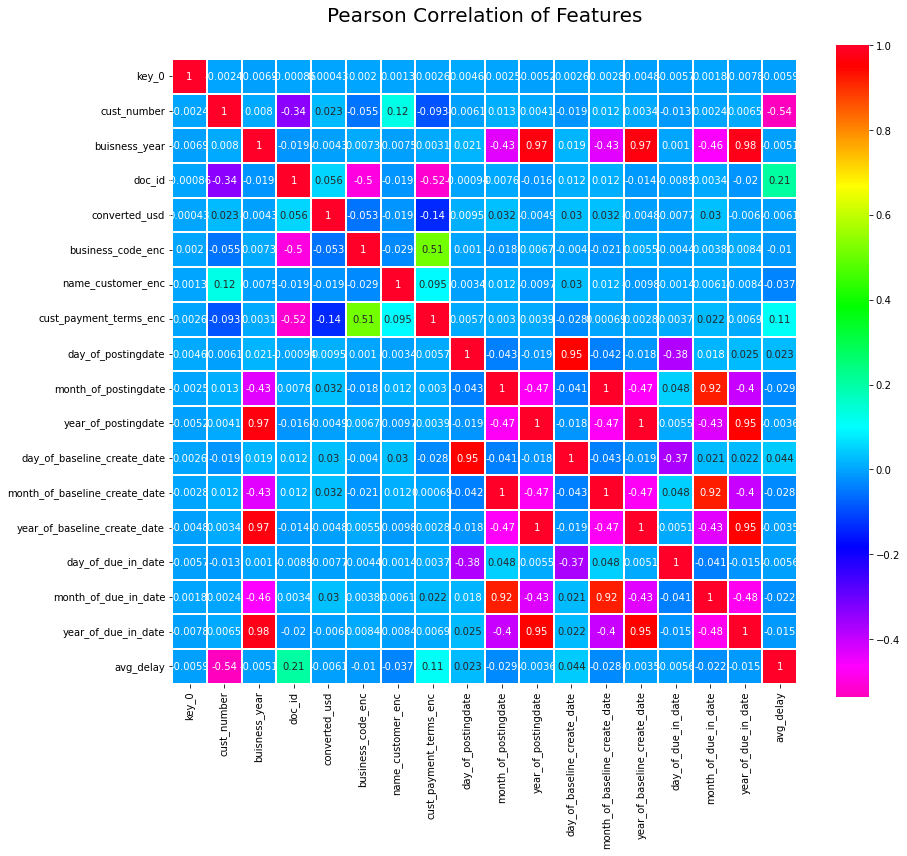

In [88]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [89]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [90]:
sel.variances_

array([1.79867713e+15, 1.15195317e-01, 8.14358365e+16, 1.33915922e+09,
       2.89199371e-01, 1.06851239e+06, 1.17330626e+02, 7.55002009e+01,
       1.22507253e+01, 1.15661120e-01, 7.71513423e+01, 1.22576245e+01,
       1.15788866e-01, 7.61732267e+01, 1.20393869e+01, 1.18619907e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [91]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [92]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [93]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [94]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

558507.5019176359

### Display The Comparison Lists

In [95]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[301562116058.6992],[0.31842492238760545],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [96]:
from sklearn.svm import SVR
Algorithm.append("Support Vector Regressor")
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [97]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [98]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

698515.1697213296

### Display The Comparison Lists

In [99]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor'],[301562116058.6992, 444372053060.142],[0.31842492238760545, -0.004346701474567949],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [100]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append("Decision Tree Regressor") 
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train) 
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [101]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [102]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

435561.78891977726

### Display The Comparison Lists

In [103]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor'],[301562116058.6992, 444372053060.142, 272565253233.4555],[0.31842492238760545, -0.004346701474567949, 0.3839621300744771],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train) 
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [105]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [106]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

363394.0379229369

### Display The Comparison Lists


In [107]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor'],[301562116058.6992, 444372053060.142, 272565253233.4555, 166026813970.50983],[0.31842492238760545, -0.004346701474567949, 0.3839621300744771, 0.624754793152923],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [108]:
%%capture
!pip install xgboost
import xgboost as xgb


In [109]:
Algorithm.append('XGB Regressor')

In [110]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [111]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [112]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

362586.38605639286

### Display The Comparison Lists


In [113]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor', 'XGB Regressor'],[301562116058.6992, 444372053060.142, 272565253233.4555, 166026813970.50983, 150827760204.38016],[0.31842492238760545, -0.004346701474567949, 0.3839621300744771, 0.624754793152923, 0.6591069073563807],

## You need to make the comparison list into a comparison dataframe 

In [114]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.015621e+11,0.318425
1,Support Vector Regressor,4.443721e+11,-0.004347
2,Decision Tree Regressor,2.725653e+11,0.383962
3,XGB Regressor,1.660268e+11,0.624755


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [115]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [116]:
mean_squared_error(y_test,predictedfinal,squared=False)

388365.49821576604

### Calculate the mean Square Error for validation dataset

In [117]:
mean_squared_error(y_val,predict_testfinal,squared=False)

362586.38605639286

### Calculate the R2 score for test

In [118]:
r2_score(y_test, predictedfinal)

0.6591069073563807

### Calculate the R2 score for Validation

In [119]:
r2_score(y_val, predict_testfinal)

0.7282586525901925

### Calculate the Accuracy for train Dataset 

In [120]:
regressorfinal.score(X_train,y_train)

0.9549386304365004

### Calculate the accuracy for validation

In [121]:
regressorfinal.score(X_val,y_val)

0.7282586525901925

### Calculate the accuracy for test

In [122]:
regressorfinal.score(X_test,y_test)

0.6591069073563807

## Specify the reason behind choosing your machine learning model 

- Note : The MSE for xgboost is the lowest

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [123]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [124]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [125]:
print(nulldata.describe())
print(nulldata.info())

       buisness_year        doc_id  converted_usd
count         9681.0  9.681000e+03    9681.000000
mean          2020.0  2.006165e+09   32065.681125
std              0.0  2.673629e+08   35419.613688
min           2020.0  1.930535e+09       0.720000
25%           2020.0  1.930658e+09    5607.190000
50%           2020.0  1.930731e+09   19024.190000
75%           2020.0  1.930818e+09   47752.640000
max           2020.0  2.960636e+09  653644.800000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-

### Storing the Nulldata into a different dataset 
# for BACKUP

In [126]:
null_backup = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [127]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [128]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [129]:
nulldata['day_of_clear_date'] = nulldata['clear_date'].dt.day
nulldata['month_of_clear_date'] = nulldata['clear_date'].dt.month
nulldata['year_of_clear_date'] = nulldata['clear_date'].dt.year

nulldata['day_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.year

nulldata['day_of_due_in_date'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due_in_date'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due_in_date'] = nulldata['due_in_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [130]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])

### Check for the datatypes of all the columns of Nulldata

In [131]:
nulldata.dtypes

business_code                            object
cust_number                               int32
name_customer                            object
clear_date                       datetime64[ns]
buisness_year                           float64
doc_id                                  float64
posting_date                     datetime64[ns]
due_in_date                      datetime64[ns]
baseline_create_date             datetime64[ns]
cust_payment_terms                       object
converted_usd                           float64
business_code_enc                         int32
day_of_clear_date                       float64
month_of_clear_date                     float64
year_of_clear_date                      float64
day_of_baseline_create_date               int64
month_of_baseline_create_date             int64
year_of_baseline_create_date              int64
day_of_due_in_date                        int64
month_of_due_in_date                      int64
year_of_due_in_date                     

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [132]:
nulldata.drop(['business_code', "baseline_create_date", "due_in_date", "posting_date", "name_customer",
            "clear_date", "cust_payment_terms", 'day_of_clear_date', "month_of_clear_date", "year_of_clear_date"], inplace=True, axis=1)

### Check the information of the "nulldata" dataframe

In [133]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_number                    9681 non-null   int32  
 1   buisness_year                  9681 non-null   float64
 2   doc_id                         9681 non-null   float64
 3   converted_usd                  9681 non-null   float64
 4   business_code_enc              9681 non-null   int32  
 5   day_of_baseline_create_date    9681 non-null   int64  
 6   month_of_baseline_create_date  9681 non-null   int64  
 7   year_of_baseline_create_date   9681 non-null   int64  
 8   day_of_due_in_date             9681 non-null   int64  
 9   month_of_due_in_date           9681 non-null   int64  
 10  year_of_due_in_date            9681 non-null   int64  
 11  day_of_postingdate             9681 non-null   int64  
 12  month_of_postingdate           9681 non-null   

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [134]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 39759 to 49999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_number                    7832 non-null   int32  
 1   buisness_year                  7832 non-null   float64
 2   doc_id                         7832 non-null   float64
 3   converted_usd                  7832 non-null   float64
 4   business_code_enc              7832 non-null   int32  
 5   name_customer_enc              7832 non-null   int32  
 6   cust_payment_terms_enc         7832 non-null   int32  
 7   day_of_postingdate             7832 non-null   int64  
 8   month_of_postingdate           7832 non-null   int64  
 9   year_of_postingdate            7832 non-null   int64  
 10  day_of_baseline_create_date    7832 non-null   int64  
 11  month_of_baseline_create_date  7832 non-null   int64  
 12  year_of_baseline_create_date   7832 non-nul

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [135]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date',
       'year_of_baseline_create_date', 'day_of_due_in_date',
       'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

In [136]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [137]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date']]

### Display the Final Dataset

In [138]:
final_data = nulldata2.reset_index(drop=True)

### Now you can pass this dataset into you final model and store it into "final_result"

In [139]:
final_result = regressorfinal.predict(final_data)


### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [140]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [141]:
final_result

0       1.057810e+06
1       3.656640e+05
2       1.405594e+05
3       3.162862e+05
4      -3.513269e+05
            ...     
9676    4.311172e+05
9677    6.232464e+05
9678   -4.665770e+05
9679    2.482762e+05
9680   -8.490655e+04
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [142]:
null_backup.reset_index(drop=True,inplace=True)
Final = null_backup.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [143]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,1.057810e+06
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,3.656640e+05
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,1.405594e+05
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,3.162862e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-3.513269e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,4.311172e+05
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,6.232464e+05
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-4.665770e+05
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,2.482762e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [144]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [145]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [146]:
Final['clear_date']

0      2020-04-22 05:50:09.625000
1      2020-04-07 05:34:23.968750
2      2020-03-27 15:02:39.437500
3      2020-05-03 15:51:26.187500
4      2020-04-21 22:24:33.062500
                  ...            
9676   2020-03-29 23:45:17.250000
9677   2020-05-25 05:07:26.375000
9678   2020-03-20 14:23:43.031250
9679   2020-04-11 20:57:56.156250
9680   2020-05-05 00:24:53.453125
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [147]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [148]:
Final['avg_delay']

0       12.0
1        4.0
2        1.0
3        3.0
4       -5.0
        ... 
9676     4.0
9677     7.0
9678    -6.0
9679     2.0
9680    -1.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [149]:
bins= [0,15,30,45,60,100]
labels =  ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [150]:
Final.drop(["key_0", "avg_delay"], inplace=True, axis=1)

### Display the count of each categoty of new "Aging Bucket" column 

In [151]:
Final["Aging Bucket"].value_counts()

0-15               7735
16-30               169
31-45                69
46-60                 6
Greatar than 60       5
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [152]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-22 05:50:09.625000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-07 05:34:23.968750,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-03-27 15:02:39.437500,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,0-15
3,U001,0200739534,OK systems,2020-05-03 15:51:26.187500,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-21 22:24:33.062500,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-29 23:45:17.250000,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-25 05:07:26.375000,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-20 14:23:43.031250,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-11 20:57:56.156250,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


### Store this dataframe into the .csv format

In [153]:
Final.to_csv("pranav_mishra.csv")

# END OF THE PROJECT